# CNVisualize Tutorial on Real Dataset

## 1. Introduction

A tool to plot number of reads in small windows for multiple samples as a heatmap, for single-cell RNA-seq data. These heatmaps would be helpful to find some patterns of CNVs.

For example, the heatmap will indicate the number of reads in each small binned windows in the whole genome, then it would be clear to see which windows contain significantly less reads, and then it might indicate there there is a potential CNV in that region.

The tool takes split single-cell RNA-seq bam files, a list of barcodes, reference genome chromosome sizes, and the window size for binnig as input, and the output would be a heatmap contains the number of reads values for each cell sample.

## 2. Goal

The goal of this tutorial is run the CNVisualize package on the whole dataset, which will generate the original number of reads count dataframe for each cell in each small window, as well as the normalized dataframe for plotting the heatmap. Finally, the heatmap will be generated at the end of this tutorial. The biological question that will be anwered is "Is their any potential CNVs can be addressed in the 20 cells by exploring their scRNA-seq data and visualizing in the heatmap?"

## 3. Dataset

The example data that will have the single-cell RNA-seq data of 20 cells, the cooresponding barcode list is given in `CNVisualize/data/sample_barcodes.txt`. The bam files (`.bam`) and their corresponding bam index files (`.bai`) are available at [https://www.dropbox.com/sh/ke5s2w7gb96m09g/AACM1vP24MTBQDFTNwUgjlWJa?dl=0].

## 4. Pipeline

After installing the `CNVisualize` package, we are able to run the analysis pipline as follows:

(1) import some essential packages and also the `CNVisualize` package.

In [2]:
import os
import pandas as pd
import CNVisualize.count as c
import CNVisualize.heatmap as heatmap

(2) If you do not have `samtools` installed in your current environment, run this code cell to install it. You may need to restart the kernel after the installation completing.

In [ ]:
# If you do not have samtools installed in your current environment.
os.popen("conda install -c bioconda samtools")

(3) Prepare the input files and initialize the input parameters, and run the analysis as follows, the two dataframe files will be stored in the given directory, and the heatmap will be shown in this part.

INFO 2023-04-09 19:50:49,093 CNVisualize.count    Arguments:
bampath : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/sorted_split_bams
bc_file : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/sample_barcodes.txt
chrom_size : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/hg19.chrom.sizes
window_size : 5000000
rundir : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/real_dataset_tutorial/output/df_5000k.csv
INFO 2023-04-09 19:50:49,095 CNVisualize.count    Start TGTGGTATCGATAGGG-1_B11
INFO 2023-04-09 19:51:25,619 CNVisualize.count    Start TGCGGGTCATTCAGTG-1_B11
INFO 2023-04-09 19:52:01,877 CNVisualize.count    Start CCTCAGTAGCTGCCCA-1_B11
INFO 2023-04-09 19:52:40,337 CNVisualize.count    Start CCACCTAAGGTGACCA-1_B11
INFO 2023-04-09 19:53:16,980 CNVisualize.count    Start ACGCCAGAGCAGTACG-1_B12
INFO 2023-04-09 19:53:53,734 CNVisualize.count    Start TATTACCTCGTGTCAA-1_B12
INFO 2023-04-09 19:54:29,326 CNVisualize.count    Start TGCCCATAGTCCGGTC-1_B12
INFO 2023-04-09 19:55:06,0

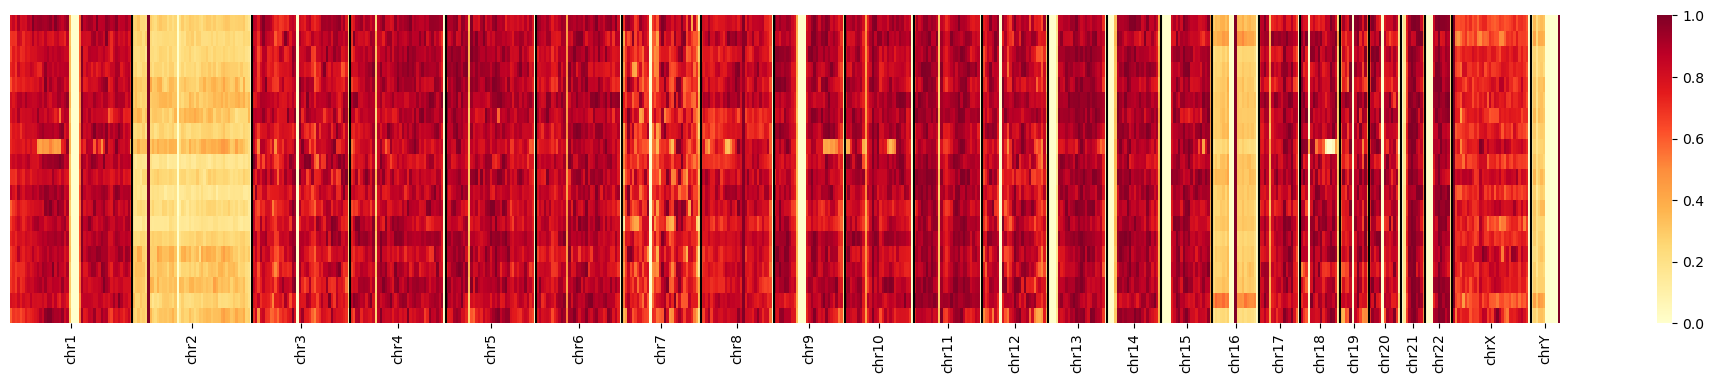

In [3]:
bam_path = "./../data/sorted_split_bams/"
barcode_path = "./../data/sample_barcodes.txt"
chrom_size_path = "./../data/hg19.chrom.sizes"
window_size = int(5e6)
out_dir = "./output/df_5000k.csv"

df_norm = c.count(bam_path, barcode_path, chrom_size_path, window_size, out_dir)
chrom_size_dict = c.read_chrom_size(chrom_size_path)
_, windows_count = c.window_indices(window_size, chrom_size_dict)

fig = heatmap.heatmap(df_norm.iloc[:,1:], windows_count)

(4) Try smaller window sizes, for example, 500k bps.

INFO 2023-04-09 20:03:22,206 CNVisualize.count    Arguments:
bampath : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/sorted_split_bams
bc_file : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/sample_barcodes.txt
chrom_size : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/hg19.chrom.sizes
window_size : 500000
rundir : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/real_dataset_tutorial/output/df_500k.csv
INFO 2023-04-09 20:03:22,211 CNVisualize.count    Start TGTGGTATCGATAGGG-1_B11
INFO 2023-04-09 20:08:05,521 CNVisualize.count    Start TGCGGGTCATTCAGTG-1_B11
INFO 2023-04-09 20:13:03,678 CNVisualize.count    Start CCTCAGTAGCTGCCCA-1_B11
INFO 2023-04-09 20:17:03,674 CNVisualize.count    Start CCACCTAAGGTGACCA-1_B11
INFO 2023-04-09 20:21:31,880 CNVisualize.count    Start ACGCCAGAGCAGTACG-1_B12
INFO 2023-04-09 20:26:00,446 CNVisualize.count    Start TATTACCTCGTGTCAA-1_B12
INFO 2023-04-09 20:30:52,316 CNVisualize.count    Start TGCCCATAGTCCGGTC-1_B12
INFO 2023-04-09 20:35:34,972

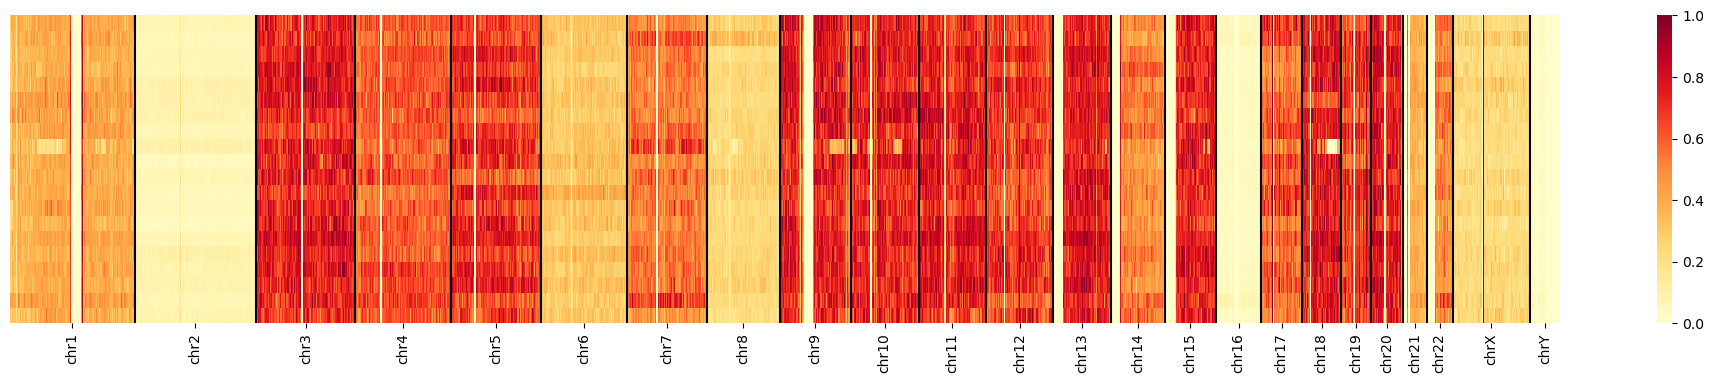

In [4]:
window_size_2 = int(5e5)
out_dir_2 = "./output/df_500k.csv"

df_norm_500k = c.count(bam_path, barcode_path, chrom_size_path, window_size_2, out_dir_2)
_, windows_count_2 = c.window_indices(window_size_2, chrom_size_dict)

fig = heatmap.heatmap(df_norm_500k.iloc[:,1:], windows_count_2)

## 5. Conclusion

By looking at the heatmap generated above, we can see the number of reads in each small windows of each cell in a straightforward way.

In this sample, we tried both 5000k windows and 500k window for the all 20 cells. From the normalzied 5000k window heatmap, we can easily discover that the cell 9 have multiple horizontal lighter color bands, which means there are potential CNV sites in this cell. The sites can be addressed more acurately when we decrease the window size, to 500k.

Another finding is, the 20 cells have the most diverse genomic mosaic patterns in chromosome 7.

For further analysis on these 20 cells, we can focus more on the horizontal bands sites in cell 9, and also we can explore more on the diversity of chromosome 7, in the aspect of copy numbers.